## DBSCAN lab

#### Data Description

The data used was cleaned. Check the EDA notebook for more details.

Data preprocessing has been done below before the training.

### Notebook Description

This notebook will cover the **DBSCAN** Classification Model.

- It

## Import Libraries

In [213]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score


%matplotlib inline

## Load the Data

In [214]:
df = pd.read_csv("cleaned_coursera_dataset.csv")

In [215]:
df.shape

(4304, 7)

In [216]:
df.head(2)

,Course Title,Rating,Provider,Level,Reviews,Type,Duration / Weeks
0,Google Data Analytics,4.8,Google,Beginner,151000.0,Professional Certificate,12 - 24
1,Google Cybersecurity,4.8,Google,Beginner,35000.0,Professional Certificate,12 - 24


## Preprocess the Data

In [217]:
# dropping Course Title column, not needed for DBSCAN
df.drop(columns=['Course Title'], inplace=True)
df.columns

Index(['Rating', 'Provider', 'Level', 'Reviews', 'Type', 'Duration / Weeks'], dtype='object')

In [218]:
# Renaming to remove spaces
df.rename(columns={'Duration / Weeks': 'Duration/Weeks'}, inplace=True)
df.columns

Index(['Rating', 'Provider', 'Level', 'Reviews', 'Type', 'Duration/Weeks'], dtype='object')

In [219]:
# Selecting numerical and categorical features separately

numerical_features = df.select_dtypes(include=['number']).columns.to_list()

categorical_features = df.select_dtypes(include=['object']).columns.to_list()

print(f'Numerical Features: {numerical_features}')
print(f'Categorical Features: {categorical_features}')

Numerical Features: ['Rating', 'Reviews']
Categorical Features: ['Provider', 'Level', 'Type', 'Duration/Weeks']


### Dealing with outliers

##### Categorical outliers

In [220]:
for i in categorical_features:
    print (df[i].value_counts())

Provider
IBM                                            208
University of Colorado Boulder                 192
University of Michigan                         167
University of Illinois Urbana-Champaign        154
Johns Hopkins University                       142
                                              ... 
Google - Spectrum Sharing                        1
NIIT                                             1
High Tech High Graduate School of Education      1
Talend                                           1
The University of Notre Dame                     1
Name: count, Length: 258, dtype: int64
Level
Beginner        2395
Intermediate    1219
Mixed            549
Advanced         141
Name: count, dtype: int64
Type
Course                      3434
Specialization               770
Professional Certificate     100
Name: count, dtype: int64
Duration/Weeks
4 - 12     1927
1 - 4      1653
12 - 24     724
Name: count, dtype: int64


In [221]:
# Calculate the frequency of each 'Provider'
type_counts = df['Provider'].value_counts()

# Filter 'Provider' values that appear 2 or more times
df = df[df['Provider'].isin(type_counts[type_counts >= 2].index)]

In [222]:
for i in categorical_features:
    print (df[i].value_counts())

Provider
IBM                                                     208
University of Colorado Boulder                          192
University of Michigan                                  167
University of Illinois Urbana-Champaign                 154
Johns Hopkins University                                142
                                                       ... 
Institut Mines-Télécom                                    2
Dell                                                      2
Genentech                                                 2
Pohang University of Science and Technology(POSTECH)      2
Royal Holloway, University of London                      2
Name: count, Length: 216, dtype: int64
Level
Beginner        2372
Intermediate    1207
Mixed            543
Advanced         140
Name: count, dtype: int64
Type
Course                      3399
Specialization               763
Professional Certificate     100
Name: count, dtype: int64
Duration/Weeks
4 - 12     1904
1 - 4      1639

##### Numerical outliers

In [223]:
# Create a histogram to show the count of each rating category to find outliers
fig_reviews_rating = px.histogram(df, x='Rating',
                                  title='Count of Each Rating Category',
                                  labels={'Rating': 'Rating Category'})

fig_reviews_rating.show()

In [224]:
# decided to treat anything below 4 as an outlier

df = df[df['Rating'] >= 4]

In [225]:
# Create a histogram to show the count of each rating category after removing outliers
fig_reviews_rating = px.histogram(df, x='Rating',
                                  title='Count of Each Rating Category',
                                  labels={'Rating': 'Rating Category'})

fig_reviews_rating.show()

In [228]:
# Checking to see how many rows lost
# Original was 4304, so only 171 rows lost. Acceptable.

df.shape

SyntaxError: invalid syntax (3478228779.py, line 4)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [ ]:
# Create the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding on each categorical feature
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

    # Get the mapping of labels
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

    # Print out the mappings and their labels
    print(f"Label Encoding Mapping {col}: {label_mapping}")


Label Encoding Mapping Provider: {'Advancing Women in Tech': 0, 'Akamai Technologies, Inc.': 1, 'Amazon Web Services': 2, 'American Museum of Natural History': 3, 'American Psychological Association': 4, 'Aptly': 5, 'Arizona State University': 6, 'Arm': 7, 'Atlassian': 8, 'Autodesk': 9, 'Automatic Data Processing, Inc. (ADP)': 10, 'Automation Anywhere': 11, 'Berklee': 12, 'Birla Institute of Technology & Science, Pilani': 13, 'Board Infinity': 14, 'CVS Health': 15, 'California Institute of the Arts': 16, 'Caltech': 17, 'Case Western Reserve University': 18, 'CertNexus': 19, 'Cisco Learning and Certifications': 20, 'Cloudera': 21, 'Codio': 22, 'Columbia University': 23, 'Commonwealth Education Trust': 24, 'CompTIA': 25, 'Copenhagen Business School': 26, 'Corporate Finance Institute': 27, 'Coursera': 28, 'Coursera Instructor Network': 29, 'Dartmouth College': 30, 'Databricks': 31, 'Deep Teaching Solutions': 32, 'DeepLearning.AI': 33, 'Dell': 34, 'Digital Marketing Institute': 35, 'Duke U

In [ ]:
df.head(2)

,Rating,Provider,Level,Reviews,Type,Duration/Weeks
0,4.8,53,1,151000.0,1,1
1,4.8,53,1,35000.0,1,1


In [ ]:
df.dtypes

Rating            float64
Provider            int32
Level               int32
Reviews           float64
Type                int32
Duration/Weeks      int32
dtype: object

In [ ]:
# # Create the pairplot
# sns.pairplot(df, kind='scatter', plot_kws={'alpha': 0.4})
# plt.show()


#### 3. Feature selection

In [ ]:
# creating the correlation matrix
correlation = df.corr(numeric_only=True)

In [ ]:
# printing the correlations for the column ''current_value'
print(correlation['Reviews'].sort_values(ascending=False))

Reviews           1.000000
Type              0.119075
Rating            0.077545
Duration/Weeks    0.004072
Level            -0.035620
Provider         -0.061301
Name: Reviews, dtype: float64


In [ ]:
# Set the correlation threshold
threshold = 0.06  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['Reviews']) > threshold]['Reviews'].index.to_list()

selected_features

['Rating', 'Provider', 'Reviews', 'Type']

In [ ]:
# selected_features = ['Rating', 'Level', 'Reviews']

In [ ]:
# Dataset with the feature that we will use in the model
df = df[selected_features]
df

,Rating,Provider,Reviews,Type
0,4.8,53,151000.0,1
1,4.8,53,35000.0,1
2,4.8,53,112000.0,1
3,4.8,53,30000.0,1
4,4.8,53,83000.0,1
...,...,...,...,...
4297,4.7,148,129.0,0
4298,5.0,122,28.0,0
4300,4.8,9,88.0,0
4301,4.4,35,62.0,0


In [ ]:
# Standardize the data
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

#### 4. Prepare train and test data

## Buliding the Model

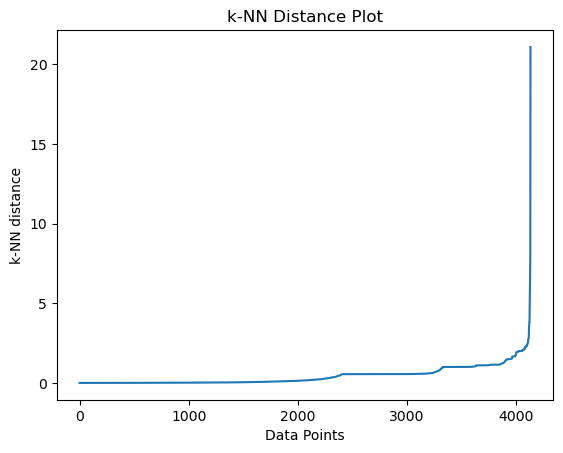

In [ ]:

# Assume X is your dataset
neighbors = NearestNeighbors(n_neighbors=4)  # Here, 4 = min_samples - 1
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

# Sort the distances and plot them
distances = np.sort(distances[:, 3], axis=0)  # Use the 4th neighbor
plt.plot(distances)
plt.ylabel('k-NN distance')
plt.xlabel('Data Points')
plt.title('k-NN Distance Plot')
plt.show()


In [ ]:
# Build the DBSCAN model

dbscan = DBSCAN(eps=2, min_samples=6)


## Train the Model

 ### DBSCAN


In [ ]:
# Fit the DBSCAN model
dbscan.fit(df)

DBSCAN(eps=2, min_samples=6)

## Evaluating the Model 

In [ ]:
# Get the cluster labels
labels = dbscan.labels_

In [ ]:
# Add the labels to your original data for analysis
df['Cluster'] = labels

In [ ]:
# Check the distribution of clusters
print(df['Cluster'].value_counts())

Cluster
 0     2005
 1     1429
 2      343
-1       86
 8       81
 6       50
 10      22
 9       16
 3       15
 4       12
 5       11
 7       10
 13       8
 11       8
 12       8
 16       8
 18       6
 17       6
 15       6
 14       3
Name: count, dtype: int64


In [ ]:
# Calculate the silhouette score (higher is better, ranges from -1 to 1)
sil_score = silhouette_score(df, labels)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: -0.3837529545779748


In [ ]:
import plotly.graph_objs as go
import numpy as np

# Assuming dbscan is the fitted DBSCAN model and df is your original (unscaled) DataFrame
# labels are the cluster labels from DBSCAN
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

unique_labels = np.unique(labels)

# Prepare data for core points, edge points, and noise using column names
core_points = df[core_samples_mask]
edge_points = df[~core_samples_mask & (labels != -1)]
noise_points = df[labels == -1]

# Create the Plotly figure
fig = go.Figure()

# Plot core points
fig.add_trace(go.Scatter3d(
    x=core_points.iloc[:, 0],
    y=core_points.iloc[:, 1],
    z=core_points.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color=labels[core_samples_mask],  # Color by cluster labels
        colorscale='Plasma',
        opacity=0.9,
        symbol='circle'
    ),
    name='Core Points'
))

# Plot edge points
fig.add_trace(go.Scatter3d(
    x=edge_points.iloc[:, 0],
    y=edge_points.iloc[:, 1],
    z=edge_points.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=6,
        color=labels[~core_samples_mask & (labels != -1)],  # Color by cluster labels
        colorscale='Plasma',
        opacity=0.7,
        symbol='diamond'
    ),
    name='Edge Points'
))

# Plot noise points
fig.add_trace(go.Scatter3d(
    x=noise_points.iloc[:, 0],
    y=noise_points.iloc[:, 1],
    z=noise_points.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color='black',
        opacity=0.5,
        symbol='x'
    ),
    name='Noise Points'
))

# Update layout with larger dimensions
fig.update_layout(
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Feature 3'
    ),
    title='3D DBSCAN Clustering with Core, Edge, and Noise Points (Original Data)',
    margin=dict(l=0, r=0, b=0, t=40),
    width=1200,  # Set the width of the plot
    height=800   # Set the height of the plot
)

# Show plot
fig.show()


In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')


Estimated number of clusters: 19
Estimated number of noise points: 86
